# COMPUTACION BLANDA - SISTEMAS Y COMPUTACION


#                                     Previa I



# Presentado por: Orfilia Castillo Maturana
#                              Ana Manuela Gamboa P



# Presentado a: Gilberto Vargas Cano





In [1]:
# Se importa las librerías que se van a utilizar en el proceso, scipy, matplotlib, numpy y os
# algunas nos ayudaran a dibujar las graficas necesarias. 
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
import os

# Se importan las carpetas DATA y CHAR en el directorio del programa
# DATA_DIR es el directorio de los datos
# CHART_DIR es el directorio de los gráficos generados
# Se importa la librería utils 
from utils import DATA_DIR, CHART_DIR

# Se eliminan las advertencias por el uso de funciones que en el futuro cambiarán
np.seterr(all='ignore')


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# Los datos con lo que se trabajarán son sacados de la pagina oficial del
# coronaviruscolombia.gov.co de Colombia y representan los casos diarios de Covid-19
# desde el primer dia que se indico el primer caso generado por este nuevo virus hasta la fecha
# Actual el documento donde se encuentran todos los datos de los que se tiene conocimiento se 
# llama datosCovid.tsv 
data = np.genfromtxt(os.path.join(DATA_DIR, "datosCovid.tsv"), delimiter="\t")

# Se establece el tipo de dato y se pone un float de 64 bits para realizar operaciones grandes en un futuro
data = np.array(data, dtype=np.float64)

# Esto se hace con el fin de verificar el orden de los valores contenidos
print("\nPrimeros 20 valores de los datos originales\n")
print(data[:20])
print("\n(Nro de filas, Nro de columnas)")
print(data.shape)


Primeros 20 valores de los datos originales

[[nan nan]
 [ 1.  1.]
 [ 2.  2.]
 [ 3.  5.]
 [ 4.  6.]
 [ 5. 12.]
 [ 6. 13.]
 [ 7. 16.]
 [ 8. 18.]
 [ 9. 18.]
 [10. 18.]
 [11. 18.]
 [12. 28.]
 [13. 28.]
 [14. 34.]
 [15. 34.]
 [16. 34.]
 [17. 36.]
 [18. 36.]
 [19. 36.]]

(Nro de filas, Nro de columnas)
(190, 2)


In [3]:
# Se definen los colores
# g = green, k = black, b = blue, m = magenta, r = red
# g = verde, k = negro, b = azul, m = magenta, r = rojo
colors = ['g', 'k', 'b', 'm', 'r']

# Se definen los tipos de líneas
# los cuales serán utilizados en las gráficas
linestyles = ['-', '-.', '--', ':', '-']

# Se crea el vector x, correspondiente a la primera columna de data
# Se crea el vercot y, correspondiente a la segunda columna de data
x = data[:, 0]
y = data[:, 1]

# la función isnan(vector) devuelve un vector en el cual los TRUE
# son valores de tipo nan, y los valores FALSE son valores diferentes
# a nan. Con esta información, este vector permite realizar 
# transformaciones a otros vectores (o al mismo vector), y realizar
# operaciones como sumar el número de posiciones TRUE, con lo
# cual se calcula el total de valores tipo nan
print("Número de entradas incorrectas:", np.sum(np.isnan(y)))

Número de entradas incorrectas: 1


In [4]:
# Se eliminan los datos incorrectos
# -----------------------------------------------------------------

# Los valores nan en el vector y deben eliminarse
# Para ello se crea un vector TRUE y FALSE basado en isnan
# Al negar dichos valores (~), los valores que son FALSE se vuelven
# TRUE, y se corresponden con aquellos valores que NO son nan
# Si el vector x, que contiene los valores en el eje x, se afectan
# a partir de dicho valores lógicos, se genera un nuevo vector en
# el que solos se toman aquellos que son TRUE. Por tanto, se crea
# un nuevo vector x, en el cual han desaparecido los correspondientes
# valores de y que son nan

# Esto mismo se aplica, pero sobre el vector y, lo cual hace que tanto
# x como y queden completamente sincronizados: sin valores nan
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
print("Numero total de filas: ",x.shape)
print("Numero total de columnas: ",y.shape)

Numero total de filas:  (189,)
Numero total de columnas:  (189,)


In [5]:
# CON ESTA FUNCIÓN SE DEFINE UN MODELO, EL CUAL CONTIENE 
# el comportamiento de un ajuste con base en un grado polinomial
# elegido
# -----------------------------------------------------------------
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    ''' dibujar datos de entrada '''

    # Crea una nueva figura, o activa una existente.
    # num = identificador, figsize: anchura, altura
    plt.figure(num=None, figsize=(8, 6))
    
    # Borra el espacio de la figura
    plt.clf()
    
    # Un gráfico de dispersión de y frente a x con diferentes tamaños 
    # y colores de marcador (tamaño = 10)
    plt.scatter(x, y, s=10)
    
    # Títulos de la figura
    # Título superior
    plt.title("Contagio de Covid-19 desde el inicio Risaralda")
    
    # Título en la base
    plt.xlabel("Tiempo")
    
    # Título lateral
    plt.ylabel("Numero de Contagios")
    
    # Obtiene o establece las ubicaciones de las marcas 
    # actuales y las etiquetas del eje x.
    
    # Los primeros corchetes ([]) se refieren a las marcas en x
    # Los siguientes corchetes ([]) se refieren a las etiquetas
    
    # En el primer corchete se tiene: 1*7*24 + 2*7*24 + ..., hasta
    # completar el total de puntos en el eje horizontal, según
    # el tamaño del vector x
    
    # Además, se aprovecha para calcular los valores de w, los
    # cuales se agrupan en paquetes de w*7*24. Esto permite
    # determinar los valores de w desde 1 hasta 5, indicando
    # con ello que se tiene un poco más de 4 semanas
    
    # Estos valores se utilizan en el segundo corchete para
    # escribir las etiquetas basadas en estos valores de w
    
    # Por tanto, se escriben etiquetas para w desde 1 hasta
    # 4, lo cual constituye las semanas analizadas
    plt.xticks(
        [w * 7 * 4 for w in range(20)], 
        ['mes %i' % w for w in range(20)])

    # Aquí se evalúa el tipo de modelo recibido
    # Si no se envía ninguno, no se dibuja ninguna curva de ajuste
    if models:
        
        # Si no se define ningún valor para mx (revisar el 
        # código más adelante), el valor de mx será
        # calculado con la función linspace

        # NOTA: linspace devuelve números espaciados uniformemente 
        # durante un intervalo especificado. En este caso, sobre
        # el conjunto de valores x establecido
        if mx is None:
            mx = np.linspace(0, x[-1], 1000)
        
        # La función zip () toma elementos iterables 
        # (puede ser cero o más), los agrega en una tupla y los devuelve
        
        # Aquí se realiza un ciclo .....
        # En este ciclo se dice que para cada modelo y estilos se utiliza una
        # paleta de colores.
        # * linestyles: Los estilos de línea simples se pueden definir utilizando las cadenas 
        # "sólido", "punteado", "discontinuo" o "dashdot". Se puede lograr un control más refinado 
        # proporcionando una tupla de guiones .
        # la funcio zip(): devuelve un iterador de tuplas basado en los objetos iterables.
        # * Si no pasamos ningún parámetro, zip()devuelve un iterador vacío
        # * Si se pasa un único iterable, zip()devuelve un iterador de tuplas con cada tupla 
        # que tiene solo un elemento.
        # * Si se pasan varios iterables, zip()devuelve un iterador de tuplas y cada tupla 
        # tiene elementos de todos los iterables.
        # For: es un bucle que repite el bloque de instrucciones un número prederminado de veces. 
        # El bloque de instrucciones que se repite se suele llamar cuerpo del bucle y cada repetición 
        # se suele llamar iteración.
        
        # en este for lo que se hace es recorrer todos los modelos y estilos y se le asigna los colores
        # a las listas que estan comprimidas con la funcion zip, esta funcion lo que hace es que me comprime
        # estas tres listas en una sola y con el for lo que se realiza es recorrerlas. 
        # con esto se obvia hacer un bucle for para cada uno de los arreglos
        
        for model, style, color in zip(models, linestyles, colors):
            # print "Modelo:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)
            
        #plt.legend: nos indica o nos muestra en la grafica la definicion de 
        #una leyenda en este caso la leyenda es que significa cada linea que se 
        #va a dibujar en el modelo, y tambien se le indica en que posicion se quiere
        #mostrar. 

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")
    # plt.autoscala: auto escalaca los valores que se van a mostrar en los ejes
    # para poder autoescalar estos valores se le tiene que decir de cuales ejes y como
    # se quieren mostrar en este caso con la definicio de  (tight =True) 
    #se indica que los valores ban a estar agrupados o apretados en los dos ejes.
    plt.autoscale(tight=True)
    # plt.ylim: Estos comandos le permiten hacer zoom o expandir el gráfico o 
    #establecer los rangos de los ejes para incluir valores importantes (como el origen).
    plt.ylim(ymin=0)
    #
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
        
    # plt.grid= esta configura las lineas de la cuadricula
    
    #eje : {'ambos', 'x', 'y'}, opcional. El eje sobre el que aplicar los cambios.
    
    #b : bool o Ninguno, opcional. Ya sea para mostrar las líneas de la cuadrícula. 
    #Si se proporcionan kwargs , se supone que desea que la cuadrícula esté activada y b se establecerá en True.
    #Si b es Ninguno y no hay kwargs , esto cambia la visibilidad de las líneas.
   
    #kwargs= propiedades de las lineas en 2D
   
    #linestyle= puede ser desplazamiento, encendido-apagado-secuencia.
    plt.grid(True, linestyle='-', color='0.75')
    
    #plt.savefig= Guarde la figura actual
    
    #fname= es una ruta, o un objeto similar a un archivo de Python, o posiblemente algún objeto dependiente del backend.
    # si fname no es una ruta o no tiene extensión, 
    #recuerde especificar el formato para asegurarse de que se usa el backend correcto.
    plt.savefig(fname)

Parámetros del modelo fp1: [   43.977097   -2161.50146347]
Error del modelo fp1: [5.54867856e+08]
Parámetros del modelo fp2: [ 5.90263460e-01 -6.81729604e+01  1.40860870e+03]
Error del modelo fp2: [88135917.18669996]


C:\Users\usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


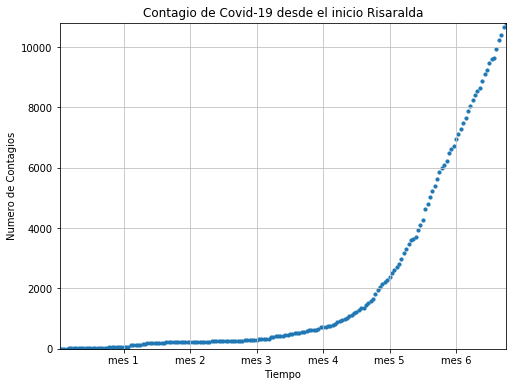

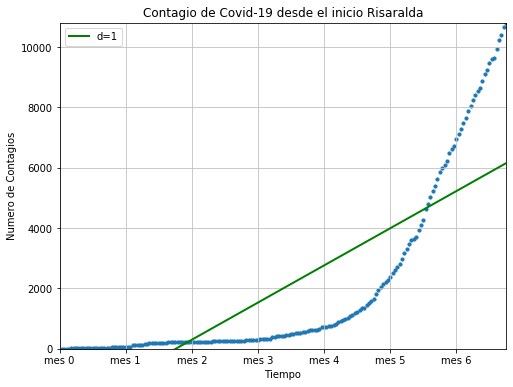

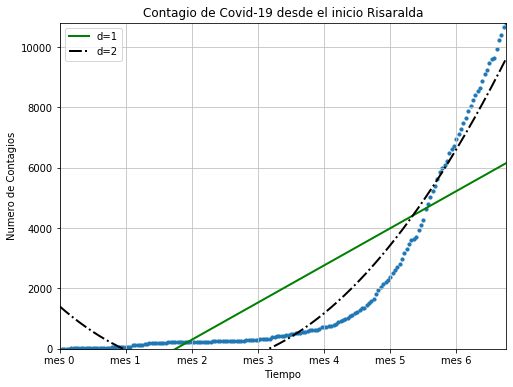

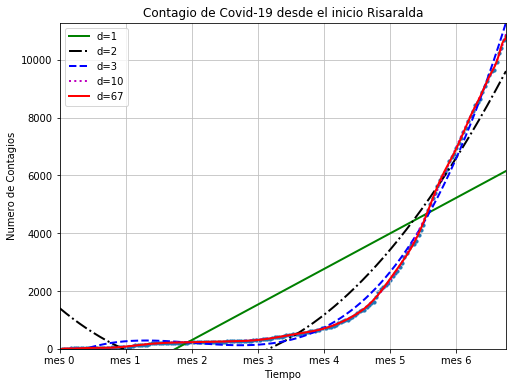

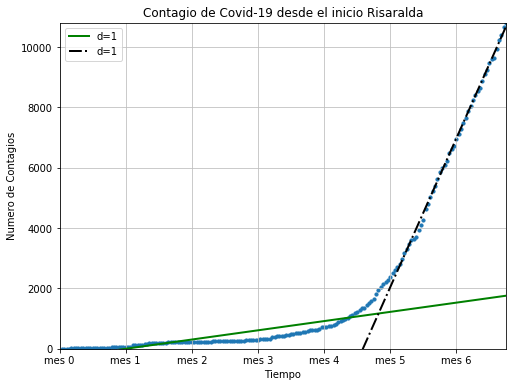

In [6]:
# Primera mirada a los datos
# -----------------------------------------------------------------
plot_models(x, y, None, os.path.join(CHART_DIR, "1400_01_01.png"))

# Crea y dibuja los modelos de datos
# -----------------------------------------------------------------
# np.polyfit= es un ajuste polinomial de mínimos cuadrados,Devuelve un vector de coeficientes p que minimiza el 
#error al cuadrado en el orden deg , deg-1 ,… 0 .p(x) = p[0] * x**deg + ... + p[deg]
#x como una matriz, forma (M,).Coordenadas x de los M puntos de muestra .(x[i], y[i])

#y array_like, forma (M,) o (M, K). Coordenadas y de los puntos de muestra. 
#Se pueden ajustar varios conjuntos de datos de puntos de muestra que comparten las mismas coordenadas x a la vez 
#pasando una matriz 2D que contiene un conjunto de datos por columna.

#grado int=Grado del polinomio de ajuste

#bool completo , opcional. Interruptor que determina la naturaleza del valor de retorno.Cuando es Falso 
#(el valor predeterminado) solo se  devuelven los coeficientes, cuando también se devuelve la información de diagnóstico 
#Verdadero de la descomposición del valor singular.

fp1, res1, rank1, sv1, rcond1 = np.polyfit(x, y, 1, full=True)
print("Parámetros del modelo fp1: %s" % fp1)
print("Error del modelo fp1:", res1)

#sp.poly1d(c_or_r [, r, variable])= es una clase polinomial unidimensional.
#c_or_r= array_like, Los coeficientes del polinomio, en potencias decrecientes, o si el valor del segundo parámetro es Verdadero, 
#las raíces del polinomio (valores donde el polinomio se evalúa como 0). 
#Por ejemplo, devuelve un objeto que representa , mientras que devuelve uno que representa 

#r = bool, opcional, Si es verdadero, c_or_r especifica las raíces del polinomio; El valor predeterminado es falso.

#str = variable y es opcional, Cambia la variable utilizada al imprimir p de x a variable
f1 = sp.poly1d(fp1)

fp2, res2, rank2, sv2, rcond2 = np.polyfit(x, y, 2, full=True)
print("Parámetros del modelo fp2: %s" % fp2)
print("Error del modelo fp2:", res2)
f2 = sp.poly1d(fp2)

f3 = sp.poly1d(np.polyfit(x, y, 3))
f10 = sp.poly1d(np.polyfit(x, y, 10))
f100 = sp.poly1d(np.polyfit(x, y, 100))

# Se grafican los modelos
# -----------------------------------------------------------------
plot_models(x, y, [f1], os.path.join(CHART_DIR, "1400_01_02.png"))
plot_models(x, y, [f1, f2], os.path.join(CHART_DIR, "1400_01_03.png"))
plot_models(
    x, y, [f1, f2, f3, f10, f100], os.path.join(CHART_DIR, 
                                                "1400_01_04.png"))

# Ajusta y dibuja un modelo utilizando el conocimiento del punto
# de inflexión
# -----------------------------------------------------------------
inflexion = 5 * 7 * 4
#se le saca los puntos de inflexion al modelo A, en sus respectivos ejes
xa = x[:int(inflexion)]
ya = y[:int(inflexion)]
#se le saca los puntos de inflexion al modelo B, en sus respectivos ejes
xb = x[int(inflexion):]
yb = y[int(inflexion):]

# Se grafican dos líneas rectas
# -----------------------------------------------------------------
fa = sp.poly1d(np.polyfit(xa, ya, 1))
fb = sp.poly1d(np.polyfit(xb, yb, 1))

# Se presenta el modelo basado en el punto de inflexión
# -----------------------------------------------------------------
plot_models(x, y, [fa, fb], os.path.join(CHART_DIR, "1400_01_05.png"))

In [7]:
# Función de error
# -----------------------------------------------------------------
def error(f, x, y):
    return np.sum((f(x) - y) ** 2)

# Se imprimen los errores
# -----------------------------------------------------------------
#se muestan los errores de todo el conjunto de los datos
print("Errores para el conjunto completo de datos:")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))
    
#se muestran los errores para f1, f2,f3, f10, f100 pero solo despues del punto de inflexion
print("Errores solamente después del punto de inflexión")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))
    
#se muestran los errores de inflexion de A y B
print("Error de inflexión=%f" % (error(fa, xa, ya) + error(fb, xb, yb)))

Errores para el conjunto completo de datos:
Error d=1: 554867856.206986
Error d=2: 88135917.186700
Error d=3: 7375531.219383
Error d=10: 314115.638545
Error d=67: 140574.168237
Errores solamente después del punto de inflexión
Error d=1: 261552977.797269
Error d=2: 25188924.526943
Error d=3: 3681262.926644
Error d=10: 253979.095270
Error d=67: 104738.406669
Error de inflexión=12532690.443950


Entrenamiento de datos únicamente despúes del punto de inflexión
Errores después del punto de inflexión
Error d=1: 550361.039898
Error d=2: 441642.399168
Error d=3: 390863.351893
Error d=10: 100363.297161
Error d=67: 46041.277350


C:\Users\usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


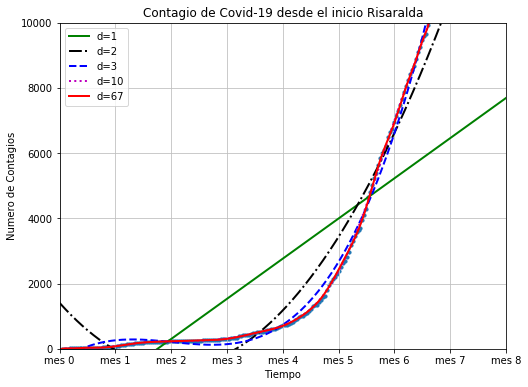

In [8]:
# Se extrapola de modo que se proyecten respuestas en el futuro
# -----------------------------------------------------------------
plot_models(
    x, y, [f1, f2, f3, f10, f100],
    os.path.join(CHART_DIR, "1400_01_06.png"),
    #linspace( inicio , parada , num = 50 , punto final = verdadero , retstep = falso , dtype = Ninguno , eje = 0 )[fuente]
    #Devuelve números espaciados uniformemente durante un intervalo especificado.
    #Devuelve el número de muestras espaciadas uniformemente, calculadas sobre el intervalo [ inicio , parada ].
    #Opcionalmente, se puede excluir el punto final del intervalo.
    
    #empezar= El valor inicial de la secuencia.
    #detener= El valor final de la secuencia, a menos que el punto final esté establecido en False. En ese caso, la secuencia 
    #consta de todas las muestras, excepto la última, espaciadas uniformemente, de modo que se excluye la parada . 
    #Tenga en cuenta que el tamaño del paso cambia cuando el punto final es Falso.
        mx=np.linspace(0 * 7 * 4, 8 * 7 * 4, 10000),
        ymax=10000, xmin=0 * 7 * 4)


print("Entrenamiento de datos únicamente despúes del punto de inflexión")
fb1 = fb
# poly1d: esta es una una funcion de clase polinomial unidimensional
# np.polyfit: Es una funcion para realizar un ajuste polinomial de mínimos cuadrados.
# El ajuste a un polinomio de grado deg a los puntos (x, y) . Devuelve un 
# vector de coeficientes p que minimiza el error al cuadrado en el orden deg , deg-1 
# En esta parte se le asignan a las variables fb2,fb3,fb10,fb100 un ajuste de grado polinomial
# donde a la funcion polyfit se le manda con los puntos x, y de la matriz y tambien recibe
# el grado polinomial. 

fb2 = sp.poly1d(np.polyfit(xb, yb, 2))
fb3 = sp.poly1d(np.polyfit(xb, yb, 3))
fb10 = sp.poly1d(np.polyfit(xb, yb, 10))
fb100 = sp.poly1d(np.polyfit(xb, yb, 100))

print("Errores después del punto de inflexión")
# en este for lo que se realiza es un analisis de cada uno de los vectores que se 
# devuelven con los ajustes polinomiales y con el analisis de la reduccion de errores,
# de cada uno de los polinomios.
for f in [fb1, fb2, fb3, fb10, fb100]:
    # se muestra en pantalla cada uno de los errores encontrados en los en cada vector 
    # los errores se muestran en el orden que fueron allados.
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

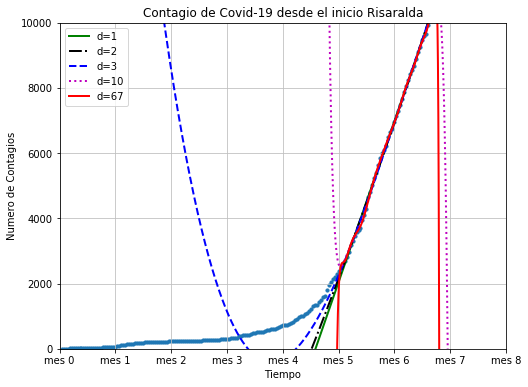

In [9]:
# Gráficas después del punto de inflexión
# -----------------------------------------------------------------
# plot.model(): crea gráficos a partir de modelos de regresión, ya sean estimaciones 
# (como los llamados gráficos de bosque o de puntos) o efectos marginales.
plot_models(
    x, y, [fb1, fb2, fb3, fb10, fb100],
    # El método en Python une uno o más componentes de ruta de forma inteligente. 
    # Este método concatena varios componentes de ruta con exactamente un separador 
    # de directorio ('/') después de cada parte no vacía excepto el último componente de ruta. 
    # Si el último componente de la ruta a unirse está vacío, se coloca un separador de directorio ('/') al final.
    # Si un componente de ruta representa una ruta absoluta, todos los componentes anteriores 
    # unidos se descartan y la unión continúa desde el componente de ruta absoluta.
    os.path.join(CHART_DIR, "1400_01_07.png"),
    # np. linspace: Devuelve números espaciados uniformemente durante un intervalo especificado.
    # normalmente  recibe como parametros un valor inicial, un valor final y un numero de muestras a generar.
    mx=np.linspace(0 * 7 * 4, 8 * 7 * 4, 10000),
    ymax=10000, xmin=0 * 7 * 4)

In [10]:

# Separa el entrenamiento de los datos de prueba
# -----------------------------------------------------------------
# se tiene agrega una variable para darle una valor de fraccion equivalente 
# al 0.3
frac = 0.3
split_idx = int(frac * len(xb))
# sp.random.permutation: permite una permutacion de manera aleatoria de una 
# secuencia y retorna un rango permutado; esta funcion recibe un arreglo o un 
# como se trata de una matriz la cual se va a nalizar, lo que primero se tiene 
# que realizar es una copia, como se muestra (list(range(len(xb)))) roma la longitud
# se crea una copia y nuevamente se guarda en otra lista, y la permutacion con los 
# valores de forma aleatoria, y nuevamente se devuelve el rango.
shuffled = sp.random.permutation(list(range(len(xb))))
# sorted: función ordena los elementos de un iterable dado en un orden específico
# y devuelve el iterable ordenado como una lista.
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
# igualmente que se vuelve y se realiza una ajuste polinomial 
# con los valores que se guardaron en los variales test,train  y se le da nuevamente 
# el grado de ajuste polinomial. y se crean los modelos en base a los datos que fueron guardados de manera
# aleatroria en las listas anteriormente mensionadas.
fbt1 = sp.poly1d(np.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(np.polyfit(xb[train], yb[train], 2))
# se imprime en pantalla el modelo polinomial de grado 2 que se guardo en la variable fbt2 
print("fbt2(x)= \n%s" % fbt2)
# se imprime en pantalla el modelo polinomial de grado 2 que se guardo en la variable fbt2 y se 
# resta 100.000 al valor independiente del polinomio que nos dio en en fbt2
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))
fbt3 = sp.poly1d(np.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(np.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(np.polyfit(xb[train], yb[train], 100))


fbt2(x)= 
        2
0.2842 x + 81.66 x - 1.481e+04
fbt2(x)-100,000= 
        2
0.2842 x + 81.66 x - 1.148e+05


C:\Users\usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Prueba de error para después del punto de inflexión
Error d=1: 115688.334318
Error d=2: 105393.800951
Error d=3: 83519.173779
Error d=10: 42558.771558
Error d=67: 38746.962645
        2
0.2842 x + 81.66 x - 1.481e+04
        2
0.2842 x + 81.66 x - 1.148e+05

100,000 Contagios esperados en el mes 18.142290


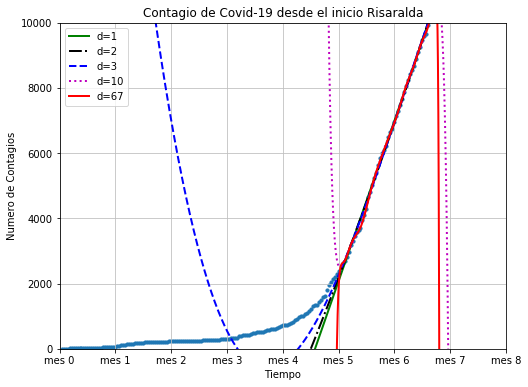

In [11]:
print("Prueba de error para después del punto de inflexión")
# se realiza una iteracion para determinar cuales son los errores que se pueden presentar 
# en los modelos despues de hacer el ajuste y analisarlos en la nueva lista de  los valores
# aleatorios que se guardaron en train.
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    # se imprimen los rerroes en orden, analizandolos en cada modelo en un punto de la lista.
    # que se guardo y de manera organizada en test
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))
    
# plot.model(): crea gráficos a partir de modelos de regresión, ya sean estimaciones 
# (como los llamados gráficos de bosque o de puntos) o efectos marginales.
plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],
# os.path.join():El método en Python une uno o más componentes de ruta de forma inteligente
    os.path.join(CHART_DIR, "1400_01_08.png"),
    mx=np.linspace(0 * 7 * 4, 8 * 7 * 4, 10000),
    ymax=10000, xmin=0 * 7 * 4)

# proporciona funciones para minimizar (o maximizar) funciones objetivo, posiblemente sujetas a restricciones. 
# Incluye solucionadores de problemas no lineales (con soporte para algoritmos de optimización locales y globales), 
# programación lineal, mínimos cuadrados restringidos y no lineales, búsqueda de raíces y ajuste de curvas.
# de esta libreria se importa la funcion fsolve: fuencion que me permite hacer una estimacion del resultado 
# Encuentra las raíces de una función.
# Devuelve las raíces de las ecuaciones (no lineales) definidas por una estimación inicial dada.
from scipy.optimize import fsolve
# imprime el polinomio de grado 2 
print(fbt2)
print(fbt2 - 100000)
# con la funcion fsolve se calcula cual va a ser las solicitudes/hora esperados las semana. lo que realmense se 
# realiza es una estimacion para que semana se van a realizar las 800 solicitudes/horas enviandole como argumento
# el polinomio de grado 2 (fbt2-100.000) y el valor que tomamos como base y lo dividimos por (7*24)a para sapar el resultado a horas.
alcanzado_max = fsolve(fbt2 - 100000, x0=2000) / (7 * 4)
print("\n100,000 Contagios esperados en el mes %f" % 
      alcanzado_max[0])